In [1]:
pip install torchmetrics

   ---------------------------------------- 0.0/868.8 kB ? eta -:--:--
   ---- ----------------------------------- 92.2/868.8 kB 2.6 MB/s eta 0:00:01
   --------------- ------------------------ 337.9/868.8 kB 4.2 MB/s eta 0:00:01
   ---------------------- ----------------- 481.3/868.8 kB 4.3 MB/s eta 0:00:01
   --------------------------------- ------ 727.0/868.8 kB 4.2 MB/s eta 0:00:01
   ----------------------------------- ---- 778.2/868.8 kB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 868.8/868.8 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/159.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/159.8 MB 7.9 MB/s eta 0:00:21
   ---------------------------------------- 0.6/159.8 MB 7.4 MB/s eta 0:00:22
   ---------------------------------------- 0.8/159.8 MB 6.3 MB/s eta 0:00:26
   ---------------------------------------- 1.0/159.8 MB 5.5 MB/s eta 0:00:29
   ---------------------------------------- 1.4/159.8 MB 5.8 MB/s e

In [11]:
import torch
torch.__version__

'2.3.0+cpu'

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

dataset = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size= 0.2, random_state=123)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# tensor - wielkosc fizyczna bez jednostki
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [15]:
import torch.nn as nn

In [16]:
# Definicja modelu
EPOCHS = 2000

model_basic = nn.Sequential(
    nn.Linear(8, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 1)
)

#epochs=2000; lr=0.0001
model_1772 = nn.Sequential(
    nn.Linear(8, 1024),
    nn.LeakyReLU(),
    nn.Linear(1024, 512),
    nn.LeakyReLU(),
    nn.Linear(512, 256),
    nn.LeakyReLU(),
    nn.Linear(256, 128),
    nn.LeakyReLU(),
    nn.Linear(128, 64),
    nn.Tanh(),
    nn.Linear(64, 32),
    nn.LeakyReLU(),
    nn.Linear(32, 16),
    nn.Tanh(),
    nn.Linear(16, 1),
)

#epochs=2000; lr=0.0005
# MAPE: 1696
model = nn.Sequential(
    nn.Linear(8, 2048),
    nn.LeakyReLU(),
    nn.Linear(2048, 1024),
    nn.LeakyReLU(),
    nn.Linear(1024, 512),
    nn.LeakyReLU(),
    nn.Linear(512, 256),
    nn.LeakyReLU(),
    nn.Linear(256, 128),
    nn.LeakyReLU(),
    nn.Linear(128, 64),
    nn.LeakyReLU(),
    nn.Linear(64, 32),
    nn.Tanh(),
    nn.Linear(32, 1),
)


In [17]:
import torch.nn as nn
import torch.optim as optim
from torchmetrics import MeanAbsolutePercentageError

loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0005) # lr - learning rate 
mape = MeanAbsolutePercentageError()

In [ ]:
import tqdm

loss_list = np.zeros((EPOCHS,))
mse_list = np.zeros((EPOCHS,))
mape_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        
        y_pred = model(X_test)        
        mse_list[epoch] = loss_fn(y_pred, y_test)
        mape_list[epoch] = mape(y_pred, y_test)

 98%|█████████▊| 1968/2000 [48:34<00:48,  1.51s/it]

MSE: 0.2676 MAPE: 0.1772


Text(0.5, 0, 'epochs')

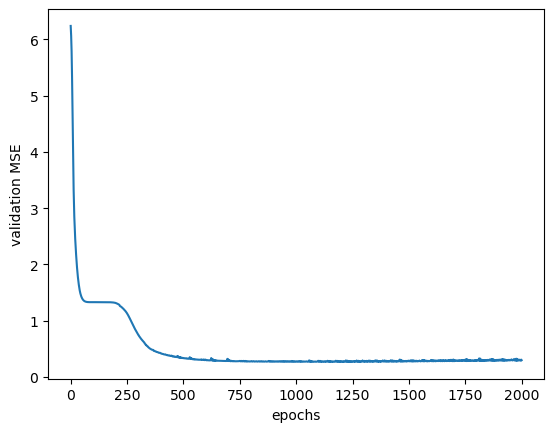

In [33]:
print(f"MSE: {min(mse_list):.4f} MAPE: {min(mape_list):.4f}")

plt.plot(mse_list)
plt.ylabel("validation MSE")
plt.xlabel("epochs")

In [ ]:
# https://lambdalabs.com/lambda-stack-deep-learning-software